In [1]:
# !pip install -U imbalanced-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from imblearn.pipeline import Pipeline 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [2]:
#importing the data
data = pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Data Cleaning

In [3]:
# data = data.fillna(data.mean(),inplace = True)
data.duplicated().any()

True

In [4]:
data = data.drop_duplicates()

In [5]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
count = data['Class'].value_counts()
print(count / len(data.index))

0    0.998333
1    0.001667
Name: Class, dtype: float64


In [7]:
fraud = data[data['Class'] == 1]
normal = data[data['Class'] == 0]
summary = pd.concat([fraud['Amount'].describe(), normal['Amount'].describe()], axis=1)
summary.columns = ['Fraud', 'Normal']
print(summary)

             Fraud         Normal
count   473.000000  283253.000000
mean    123.871860      88.413575
std     260.211041     250.379023
min       0.000000       0.000000
25%       1.000000       5.670000
50%       9.820000      22.000000
75%     105.890000      77.460000
max    2125.870000   25691.160000


In [8]:
data = data.drop(['V7','V20'],axis = 1)

# EDA

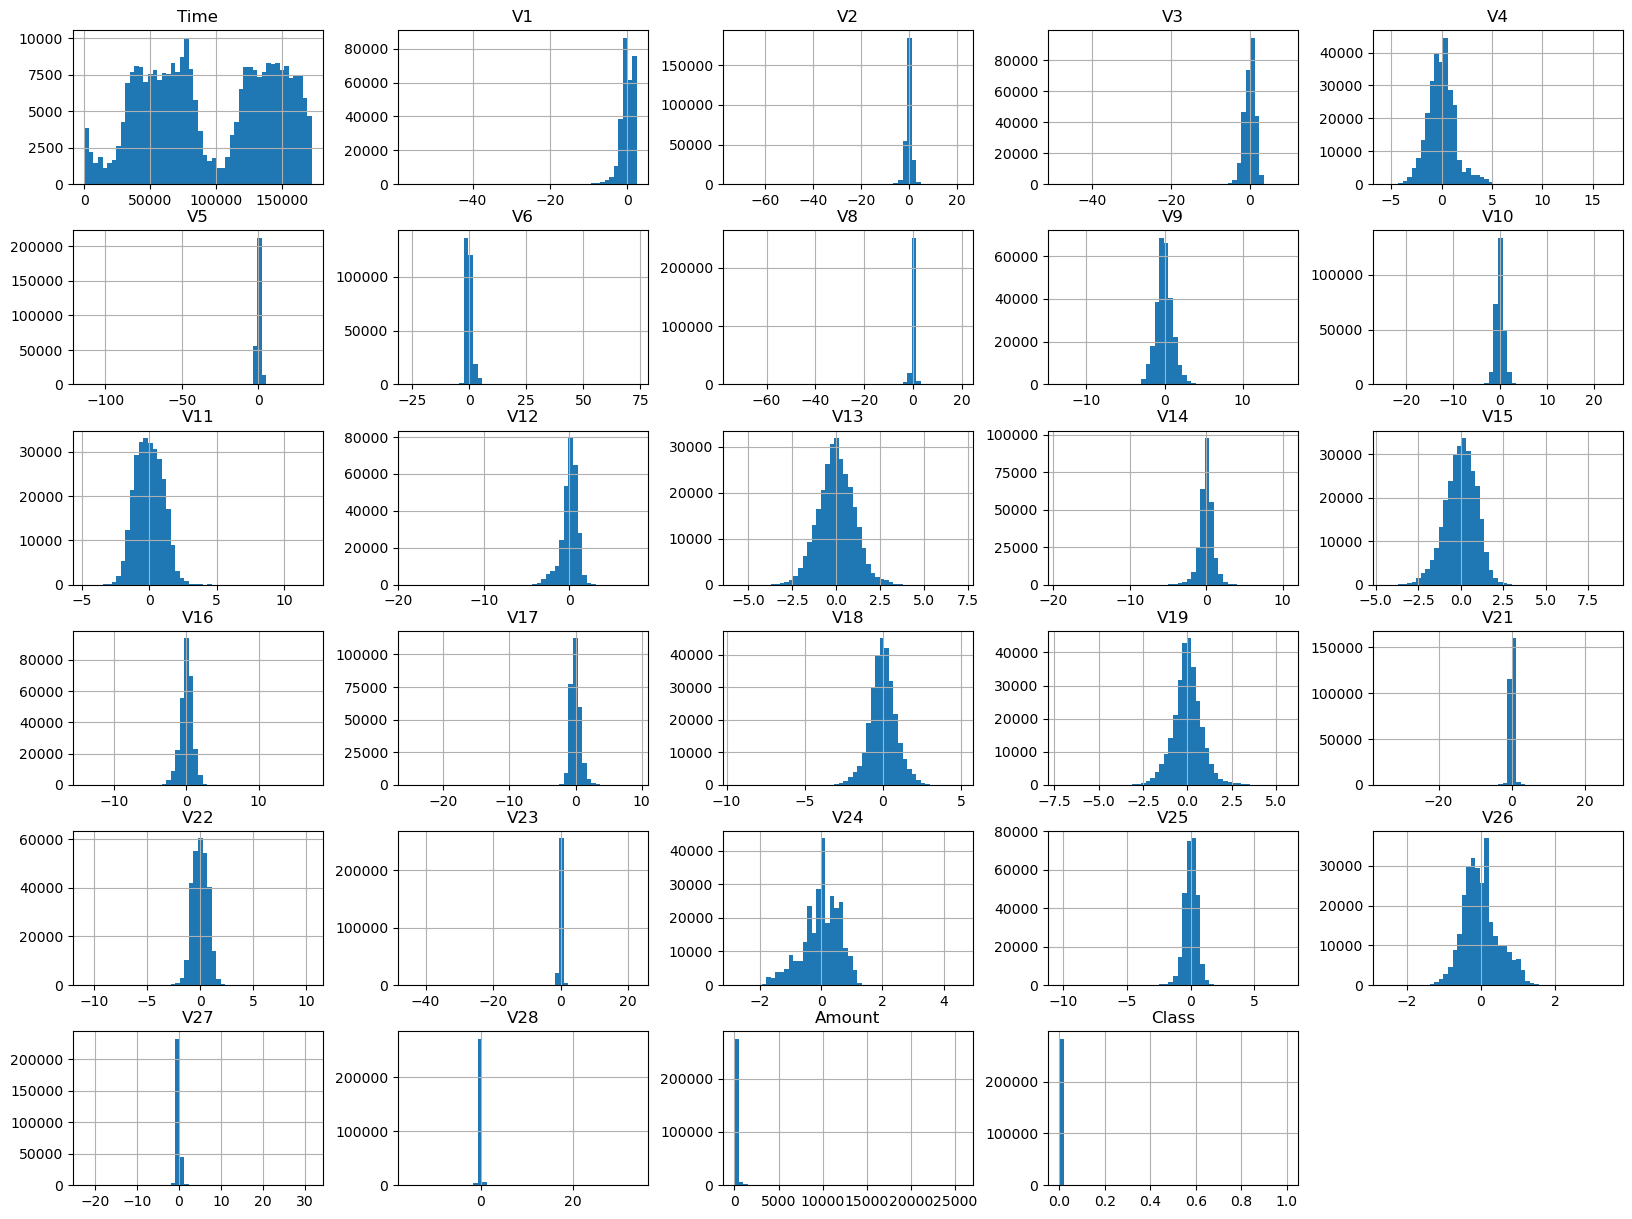

In [9]:
data.hist(bins=50, figsize=(20,15))
plt.show()

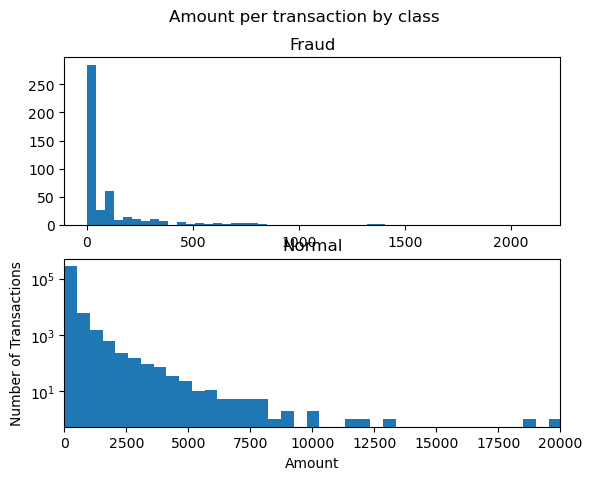

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1,)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

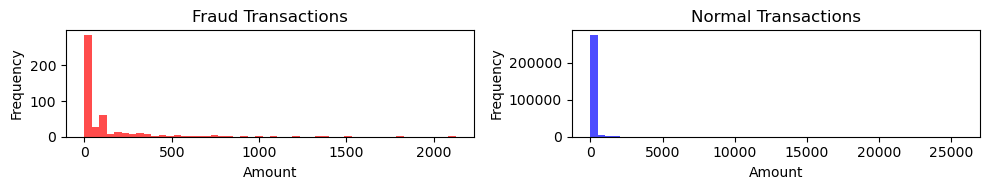

In [11]:
plt.figure(figsize=(10, 2))

plt.subplot(1, 2, 1)
plt.hist(fraud['Amount'], bins=50, color='red', alpha=0.7)
plt.title('Fraud Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(normal['Amount'], bins=50, color='blue', alpha=0.7)
plt.title('Normal Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

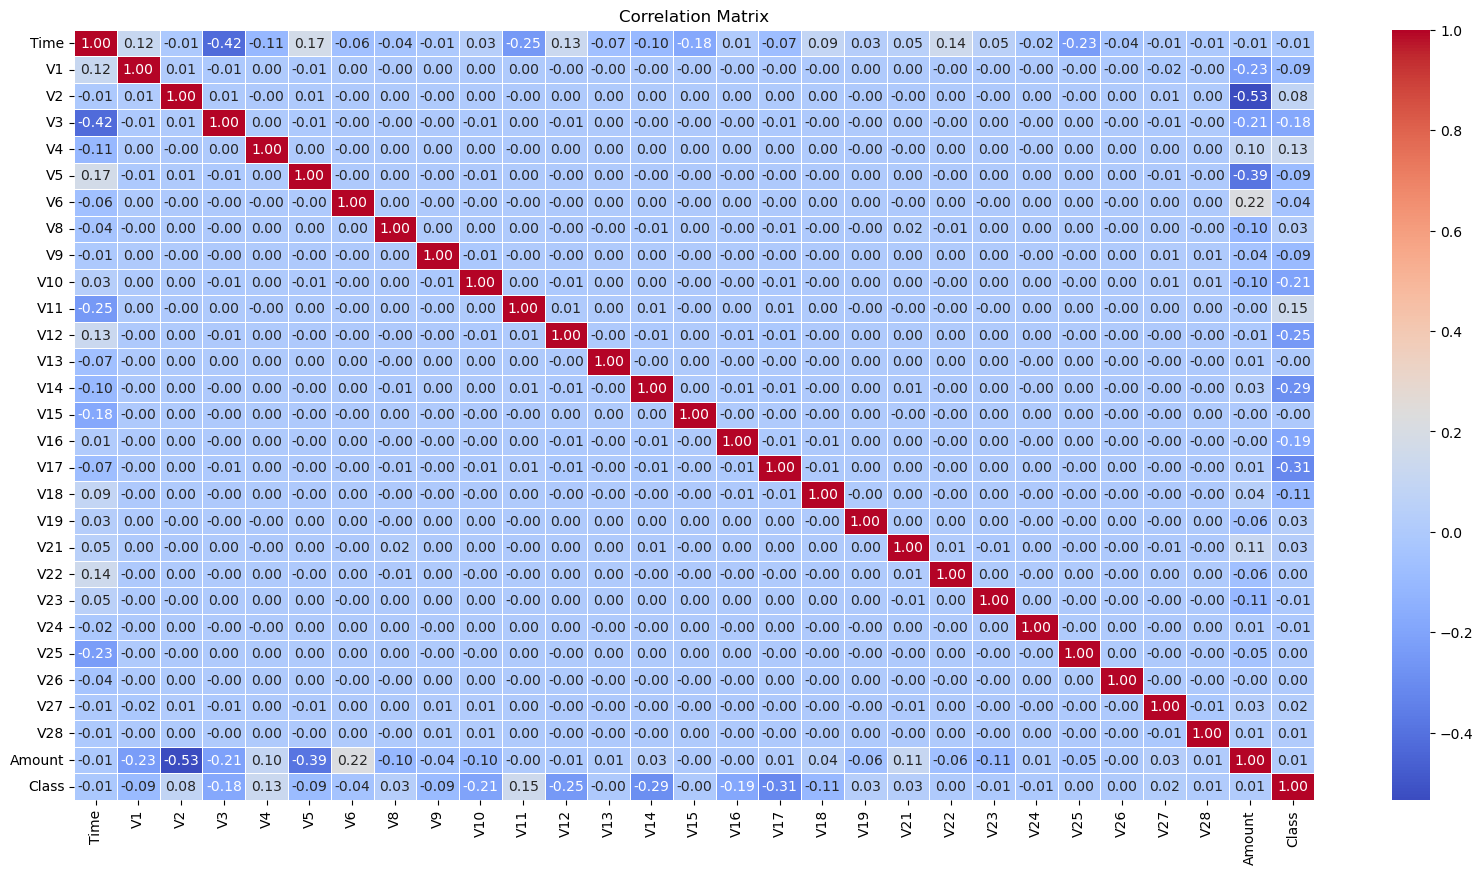

In [12]:
correlation_matrix = data.corr()

# Visualize correlation matrix
plt.figure(figsize=(20, 10))
plt.title('Correlation Matrix')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

# Data Preprocessing

In [13]:
#target Variables
X = data.drop(['Class'],axis = 1)
Y = data['Class']

In [14]:
#splitting
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

In [16]:
import warnings
warnings.filterwarnings('ignore')

# Apply SMOTE to balance the classes
resampling = SMOTE(random_state=0)
X_resampled, y_resampled = resampling.fit_resample(X, Y)

In [17]:
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Class'] = y_resampled

In [18]:
# Print the value_counts on the original labels y
print(pd.value_counts(pd.Series(Y)))

# Print the value_counts on resampled data
print(pd.value_counts(pd.Series(y_resampled)))

0    283253
1       473
Name: Class, dtype: int64
0    283253
1    283253
Name: Class, dtype: int64


# Model training

In [19]:
### ANN 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the ANN model
ann_model = Sequential()
ann_model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
ann_model.add(Dense(units=32, activation='relu'))
ann_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs= 5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
ann_loss, ann_accuracy = ann_model.evaluate(X_test, y_test)
print(f"ANN Model Accuracy: {ann_accuracy}")

# Make predictions
ann_predictions = (ann_model.predict(X_test) > 0.5).astype("int32")

Epoch 1/5
6207/6207 [==============================] - 29s 4ms/step - loss: 14.3871 - accuracy: 0.9965 - val_loss: 1.3730 - val_accuracy: 0.9982
Epoch 2/5
6207/6207 [==============================] - 25s 4ms/step - loss: 4.2610 - accuracy: 0.9964 - val_loss: 4.1480 - val_accuracy: 0.9984
Epoch 3/5
6207/6207 [==============================] - 25s 4ms/step - loss: 1.7412 - accuracy: 0.9964 - val_loss: 0.3937 - val_accuracy: 0.9984
Epoch 4/5
6207/6207 [==============================] - 26s 4ms/step - loss: 0.1325 - accuracy: 0.9980 - val_loss: 0.0270 - val_accuracy: 0.9984
Epoch 5/5
2660/2660 [==============================] - 8s 3ms/step - loss: 0.0349 - accuracy: 0.9984
ANN Model Accuracy: 0.9984139800071716
2660/2660 [==============================] - 7s 3ms/step


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.preprocessing import LabelEncoder

# Encode labels in y_test if they are strings
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
ext = ExtraTreesClassifier(random_state=12)

ext.fit(X_train_scaled, y_train)

ExtraTreesClassifier(random_state=12)

In [25]:
print(classification_report(y_preds_ext, y_test_encoded))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85013
           1       0.75      0.96      0.85       105

    accuracy                           1.00     85118
   macro avg       0.88      0.98      0.92     85118
weighted avg       1.00      1.00      1.00     85118

